In [5]:
import pandas as pd
import numpy as np

from datetime import datetime



import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

# Exercises
Remember to document your thoughts and any takeaways as you work through visualizations!

Using your store items data you prepped in lesson 2 exercises:

In [7]:
# importing store data
df = prepare.prep_store_data()

1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

In [10]:
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total,daily_difference
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,218.40,207.48


In [11]:
# I'm gunna use percent based splitting 
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

2. Validate your splits by plotting X_train and y_train.

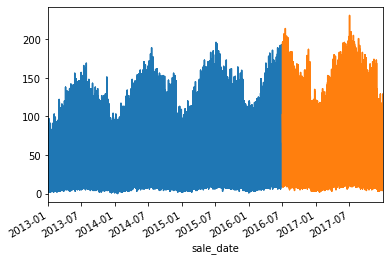

In [53]:
train.sale_amount.plot()
test.sale_amount.plot()

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

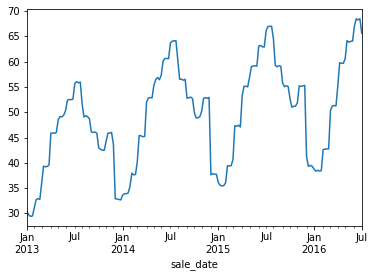

In [25]:
y = train.sale_amount.resample('W').mean()
y.plot()

# our weekly sales go up in the summer

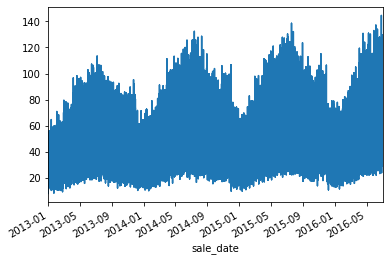

In [24]:
train.sale_amount.rolling(5).mean().plot()

4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

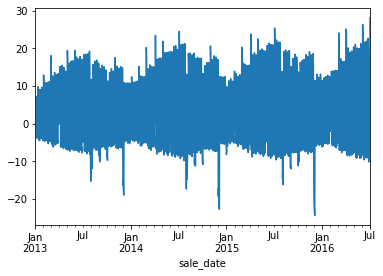

In [28]:
train.sale_amount.resample('D').mean().diff(periods=5).plot()

# It's hard to tell it's so jumbled which i guess answers the 
#question...sales are all over the place every day

5. Plot a time series decomposition.

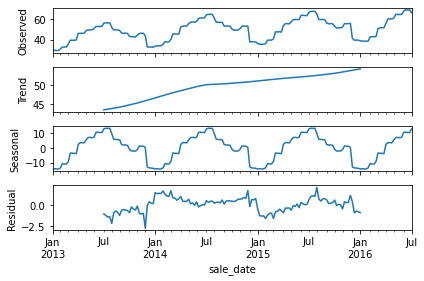

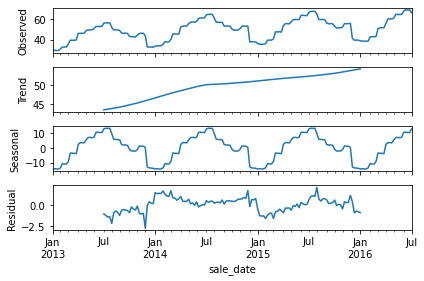

In [32]:
decomp = sm.tsa.seasonal_decompose(train.sale_amount.resample("W").mean(), model='additive')

decomp.plot()

6. Create a lag plot (day over day).

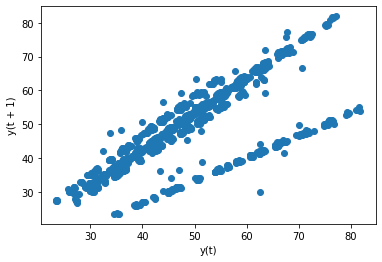

In [36]:
pd.plotting.lag_plot(train.sale_amount.resample("D").mean(), lag=1)

7. Run a lag correlation.

In [37]:
df_corr = pd.concat([train.sale_amount.shift(1), train.sale_amount], axis=1)
df_corr.columns= ['t-1', 't+1']
result = df_corr.corr()

print(result)

         t-1      t+1
t-1  1.00000  0.18888
t+1  0.18888  1.00000


Using your OPS data you prepped in lesson 2 exercises:

In [43]:
ops = prepare.prep_german_energy()

In [44]:
ops.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,01,2006
2006-01-02,1380.521,NaN,NaN,NaN,01,2006


In [45]:
ops.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
month          4383 non-null object
year           4383 non-null object
dtypes: float64(4), object(2)
memory usage: 239.7+ KB


1. Split your data into train and test using the percent cutoff method.

In [51]:
train_size = .70
n = ops.shape[0]
test_start_index = round(train_size * n)

ops_train = ops[:test_start_index] # everything up (not including) to the test_start_index
ops_test = ops[test_start_index:] # everything from the test_start_index to the end

2. Validate your splits by plotting X_train and y_train.

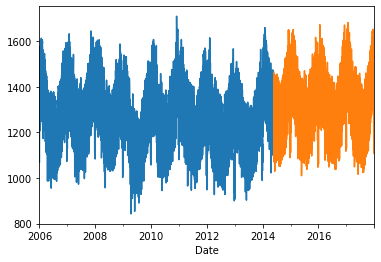

In [52]:
ops_train.Consumption.plot()
ops_test.Consumption.plot()

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

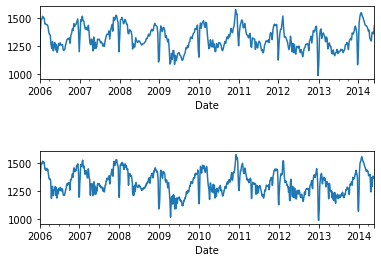

In [58]:
plt.subplot(211)
ops_train.Consumption.resample("W").mean().plot()

plt.subplot(212)
ops_train.Consumption.rolling(7).mean().plot()

plt.subplots_adjust(hspace=1)

>are these the same?

4. Group the electricity consumption time series by month of year, to explore annual seasonality.

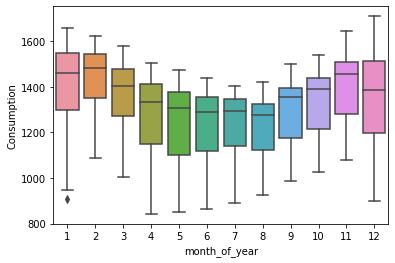

In [61]:
ops_train['month_of_year'] = ops_train.index.month

sns.boxplot(data=ops_train, x="month_of_year", y='Consumption')

5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

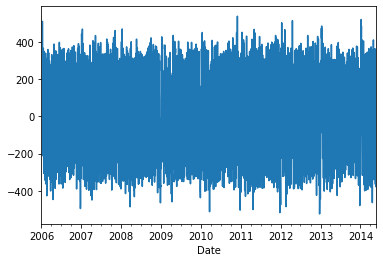

In [65]:
ops_train.Consumption.resample("D").mean().diff(periods=10).plot()

6. Plot a time series decomposition. Takeaways?

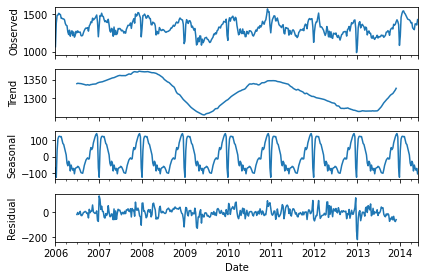

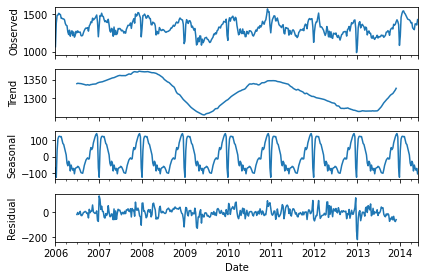

In [66]:
ops_decomp = sm.tsa.seasonal_decompose(ops_train.Consumption.resample("W").mean(), model='additive')

ops_decomp.plot()

In [ ]:
# as we're saving energy and being more energy concious it seems
# the industry is beginning to take a hit

If time:

For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.

In [68]:
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total,daily_difference
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,218.40,207.48


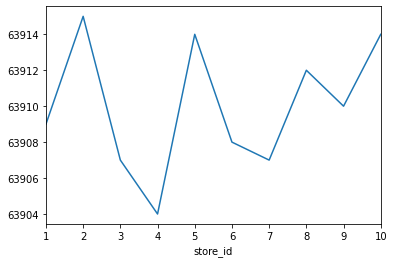

In [82]:
train.groupby('store_id')['item_id'].count().plot()

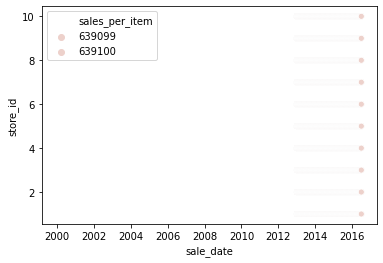

In [83]:
train['sales_per_item'] = train['item_id'].count()



sns.scatterplot(x=train.index, y='store_id', hue='sales_per_item', data=train)